# testing the triplet loader 

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys

sys.path.append('..')

Loaded 30 alphabets
  Gujarati: 960 images
  Korean: 800 images
  Arcadian: 520 images
  Malay_(Jawi_-_Arabic): 800 images
  Grantha: 860 images
  Blackfoot_(Canadian_Aboriginal_Syllabics): 280 images
  Balinese: 480 images
  Futurama: 520 images
  N_Ko: 660 images
  Burmese_(Myanmar): 680 images
  Anglo-Saxon_Futhorc: 580 images
  Mkhedruli_(Georgian): 820 images
  Latin: 520 images
  Braille: 520 images
  Sanskrit: 840 images
  Japanese_(hiragana): 1040 images
  Tagalog: 340 images
  Greek: 480 images
  Ojibwe_(Canadian_Aboriginal_Syllabics): 280 images
  Japanese_(katakana): 940 images
  Early_Aramaic: 440 images
  Hebrew: 440 images
  Tifinagh: 1100 images
  Asomtavruli_(Georgian): 800 images
  Armenian: 820 images
  Syriac_(Estrangelo): 460 images
  Alphabet_of_the_Magi: 400 images
  Cyrillic: 660 images
  Bengali: 920 images
  Inuktitut_(Canadian_Aboriginal_Syllabics): 320 images


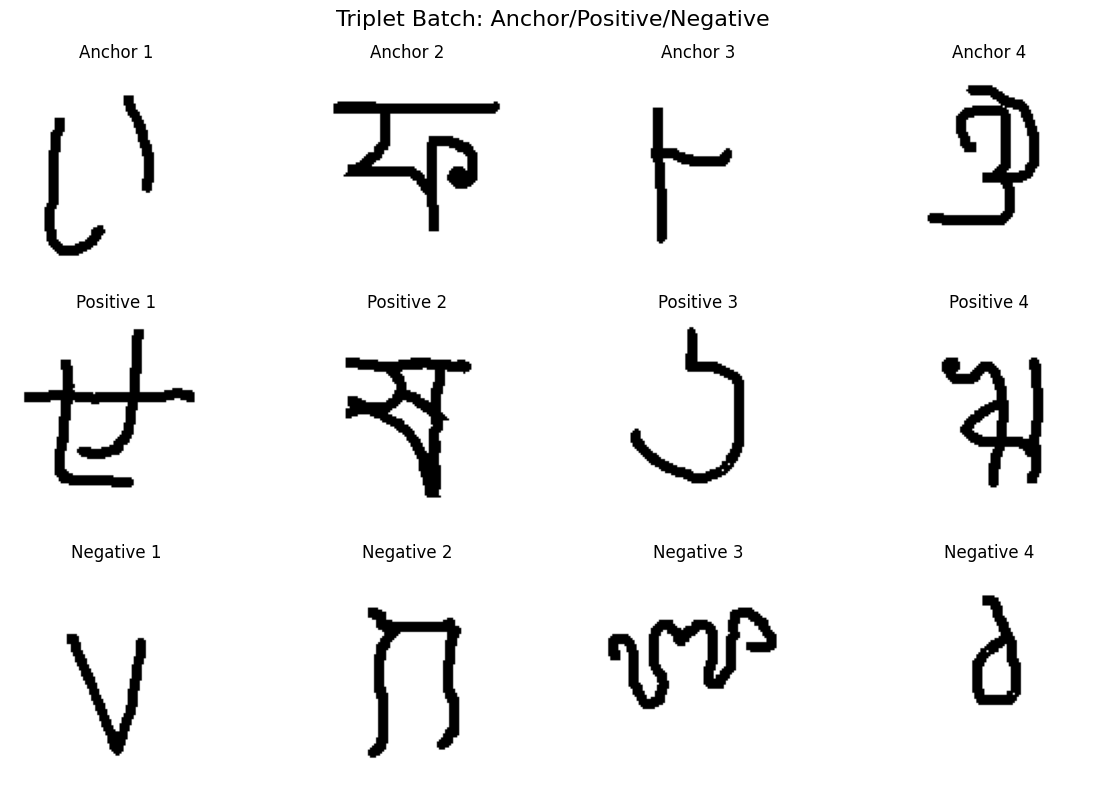

In [2]:
from src.data_loader import OmniglotTripletLoader

loader = OmniglotTripletLoader("../../omniglot/python")
anchors, positives, negatives = loader.generate_batch(4)

# Visualize a batch
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.suptitle('Triplet Batch: Anchor/Positive/Negative', fontsize=16)

for i in range(4):
    axes[0, i].imshow(anchors[i].squeeze(), cmap='gray')
    axes[0, i].set_title(f'Anchor {i+1}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(positives[i].squeeze(), cmap='gray')
    axes[1, i].set_title(f'Positive {i+1}')
    axes[1, i].axis('off')
    
    axes[2, i].imshow(negatives[i].squeeze(), cmap='gray')
    axes[2, i].set_title(f'Negative {i+1}')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

In [3]:
# import and create model 
from src.models import create_triplet_model, triplet_loss

# create triplet model
triplet_model, base_network = create_triplet_model(embedding_dim=128)

# check architecture
triplet_model.summary()

/Users/gboa/build_space/alph/alphaba/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor (InputLayer) │ (None, 105, 105,  │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive            │ (None, 105, 105,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative            │ (None, 105, 105,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128)       │ 39,472,064 │ anchor[0][0],     │
│ (Sequential)        │                   │            │ positive[0][0],   │
│                     │                   │            │ negative[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 39,472,064 (150.57 MB)

 Trainable params: 39,472,064 (150.57 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from src.models import create_triplet_model
from src.training import train_triplet_model_custom

# Create model (no compile needed)
triplet_model, base_network = create_triplet_model(embedding_dim=128)

# Train with custom loop
history = train_triplet_model_custom(
    triplet_model, 
    loader, 
    epochs=5, 
    batch_size=16, 
    steps_per_epoch=50
)

Epoch 1/5
 Step 0/50 - loss: 0.2001
 Step 20/50 - loss: 0.1974
 Step 40/50 - loss: 0.2000
 Epoch 1 - avg loss: 0.2103
--------------------------------------------------
Epoch 2/5
 Step 0/50 - loss: 0.2000
 Step 20/50 - loss: 0.2000
 Step 40/50 - loss: 0.2000
 Epoch 2 - avg loss: 0.2000
--------------------------------------------------
Epoch 3/5
 Step 0/50 - loss: 0.2000
 Step 20/50 - loss: 0.2000
 Step 40/50 - loss: 0.2000
 Epoch 3 - avg loss: 0.2000
--------------------------------------------------
Epoch 4/5
 Step 0/50 - loss: 0.2000
 Step 20/50 - loss: 0.2000
 Step 40/50 - loss: 0.2000
 Epoch 4 - avg loss: 0.2000
--------------------------------------------------
Epoch 5/5
 Step 0/50 - loss: 0.2000
 Step 20/50 - loss: 0.2000
 Step 40/50 - loss: 0.2000
 Epoch 5 - avg loss: 0.2000
--------------------------------------------------


In [5]:
# visualise what model learned:
from src.training import evaluate_embeddings

# create a t-SNE plot of the learned embeddings
embeddings, labels = evaluate_embeddings(triplet_model, loader)

NameError: name 'data' is not defined